In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.mlab as mlab
%matplotlib inline
pd.set_option('display.max_columns', None)
df = pd.read_excel('./yeyeye.xlsx')
df.head(10)

,Year,Country,SP,Total_weight,Grownth_GDP,Inflation_rate,GDP_per_capital,Fiscal_Balance,Government_debt,Current_account_balance,Government_Effectiveness,Control_of_curruption
0,2006,CHN,1,0.953172,10.713288,1.649431,2099.229435,-0.76,25.38,8.424126,0.070475,-0.514581
1,2006,GBR,1,0.953172,2.584105,2.455662,44472.574235,-2.57,39.95,-2.814397,1.670994,1.792327
2,2006,BRA,0,0.247159,3.961989,4.183568,5886.463682,-3.57,55.48,1.181714,-0.320333,-0.109042
3,2006,RUS,1,0.861370,8.200068,9.668655,6920.189125,6.29,9.79,9.325459,-0.438045,-0.910895
4,2006,FRA,1,0.953172,2.449324,1.675124,36443.626306,-2.40,64.60,0.022183,1.632802,1.463727
5,2006,DEU,1,0.953172,3.816442,1.577428,36323.447742,-1.65,66.90,5.797964,1.650243,1.803052
6,2006,TUR,0,0.544827,6.947988,9.597242,8101.856924,1.76,44.26,-5.593854,0.120086,0.027346
7,2006,AUS,1,0.541896,2.726893,3.555288,36044.922811,1.78,9.97,-6.062233,1.711956,1.960568
8,2006,GRC,1,0.399212,5.652434,3.195944,24801.157784,-5.90,103.60,-10.821246,0.636948,0.363786
9,2006,HRV,1,0.156196,4.938357,3.189826,11695.944664,-3.10,38.80,-7.686457,0.571395,0.078597


In [2]:
df.drop('Year', axis = 1, inplace = True)
df.columns

Index(['Country', 'SP', 'Total_weight', 'Grownth_GDP', 'Inflation_rate',
       'GDP_per_capital', 'Fiscal_Balance', 'Government_debt',
       'Current_account_balance', 'Government_Effectiveness',
       'Control_of_curruption'],
      dtype='object')

In [3]:
df.drop('Country', axis = 1, inplace = True)
df.columns

Index(['SP', 'Total_weight', 'Grownth_GDP', 'Inflation_rate',
       'GDP_per_capital', 'Fiscal_Balance', 'Government_debt',
       'Current_account_balance', 'Government_Effectiveness',
       'Control_of_curruption'],
      dtype='object')

In [4]:
df = pd.get_dummies(df)

In [5]:
X = df.drop(columns='SP')

y= df["SP"]
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10000 )
X_train.shape

(1068, 9)

In [6]:
model =LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Admin\uu\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Government_Effectiveness'),
  Text(1, 0, 'Control_of_curruption'),
  Text(2, 0, 'Total_weight'),
  Text(3, 0, 'Grownth_GDP'),
  Text(4, 0, 'Current_account_balance'),
  Text(5, 0, 'GDP_per_capital'),
  Text(6, 0, 'Government_debt'),
  Text(7, 0, 'Inflation_rate'),
  Text(8, 0, 'Fiscal_Balance')])

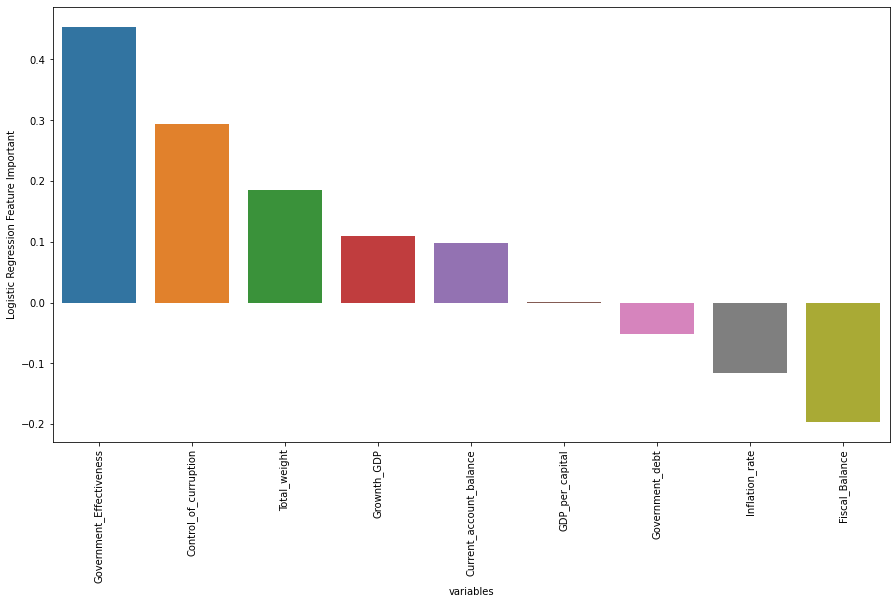

In [8]:
importances = pd.concat([
pd.DataFrame(X_train.columns, columns = ['variables']),
pd.DataFrame(np.transpose(model.coef_), 
columns = ["Logistic Regression Feature Important"])],axis = 1)
featImport = importances.sort_values("Logistic Regression Feature Important", ascending = False)
fig = plt.figure(figsize=(15, 8))
t = sns.barplot(x=featImport.iloc[:,0], y=featImport.iloc[:,1])
plt.xticks(rotation=90)